# John's House Price

## Importing Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import nltk

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
from tensorflow

## Load and Inspect Data

In [2]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [11]:
train_df_raw['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [3]:
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)
ames_eda(train_df_raw)

,null_sum,null_pct,dtypes,count,mean,median,min,max
1stFlrSF,0,0.000000,int64,1460,1162.626712,1087.0,334,4692
2ndFlrSF,0,0.000000,int64,1460,346.992466,0.0,0,2065
3SsnPorch,0,0.000000,int64,1460,3.409589,0.0,0,508
Alley,1369,0.937671,object,91,NaN,NaN,NaN,NaN
BedroomAbvGr,0,0.000000,int64,1460,2.866438,3.0,0,8
...,...,...,...,...,...,...,...,...
Utilities,0,0.000000,object,1460,NaN,NaN,AllPub,NoSeWa
WoodDeckSF,0,0.000000,int64,1460,94.244521,0.0,0,857
YearBuilt,0,0.000000,int64,1460,1971.267808,1973.0,1872,2010
YearRemodAdd,0,0.000000,int64,1460,1984.865753,1994.0,1950,2010


In [4]:
train_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
test_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


## Check Missingness

In [6]:
# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


,feature,train_missing_count,test_missing_count
0,LotFrontage,259.0,227.0
1,Alley,1369.0,1352.0
2,MasVnrType,8.0,16.0
3,MasVnrArea,8.0,15.0
4,BsmtQual,37.0,44.0
5,BsmtCond,37.0,45.0
6,BsmtExposure,38.0,44.0
7,BsmtFinType1,37.0,42.0
8,BsmtFinType2,38.0,42.0
9,Electrical,1.0,NaN


In [7]:
#Drop columns with NA rows
train_df=train_df_raw.dropna(axis=1)
test_df=test_df_raw.dropna(axis=1)

# check if dropping NA worked
print("Train Data w/ NaN? ->", train_df.isnull().sum(axis=0)[train_df.isnull().sum(axis=0) != 0])
print("Test Data w/ NaN? ->", test_df.isnull().sum(axis=0)[test_df.isnull().sum(axis=0) != 0])
#Series is empty means all the NaN data is removed.

print(train_df.shape)
print(test_df.shape)

Train Data w/ NaN? -> Series([], dtype: int64)
Test Data w/ NaN? -> Series([], dtype: int64)
(1460, 62)
(1459, 47)


## Duplicates?

In [8]:
# There are no perfectly duplicated rows
print("Duplicates in Train Data:",sum(train_df.duplicated()))
print("Duplicates in Test Data:",sum(test_df.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


## Correlations between SalesPrice and Other Features


In [9]:
#Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


Float & Int Features: 37


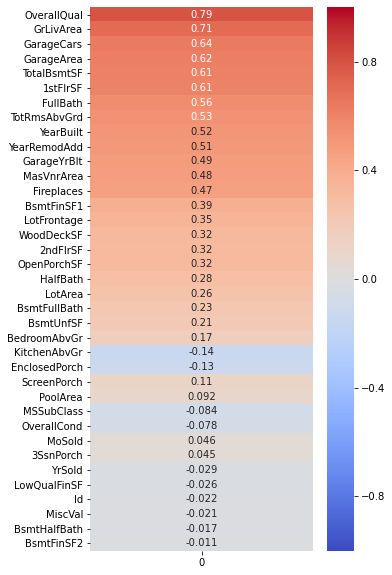

In [10]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

In [11]:
# Showing Features with Object type
print("Features of Object Type:")               
print(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')].index)

Features of Object Type:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

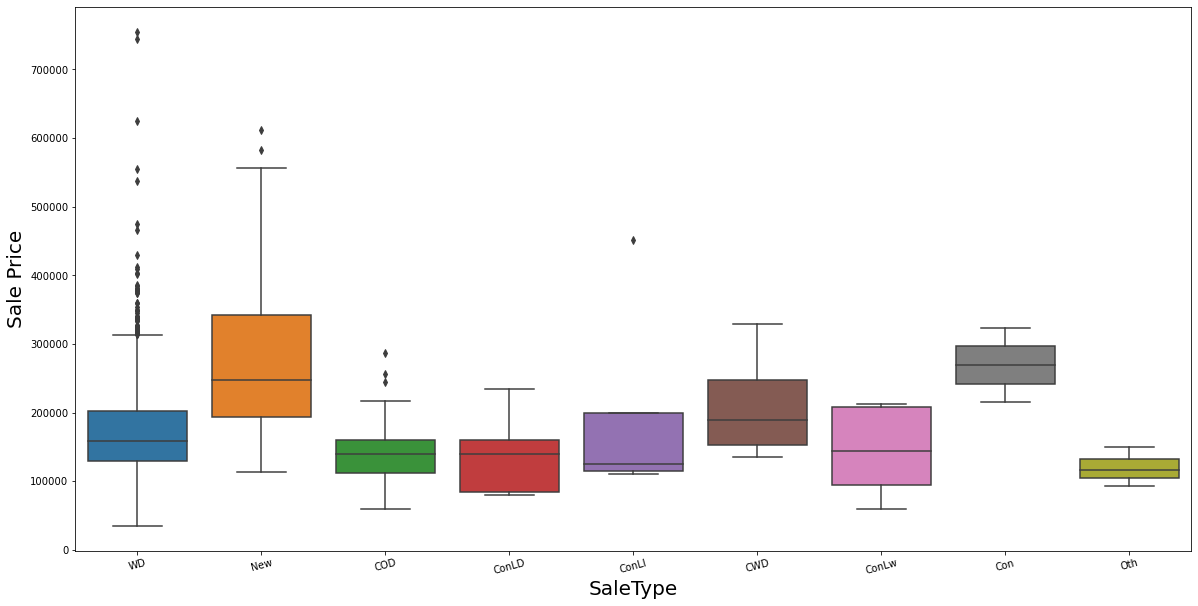

In [12]:
#Correlations between Sales Price & Object Feature
feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

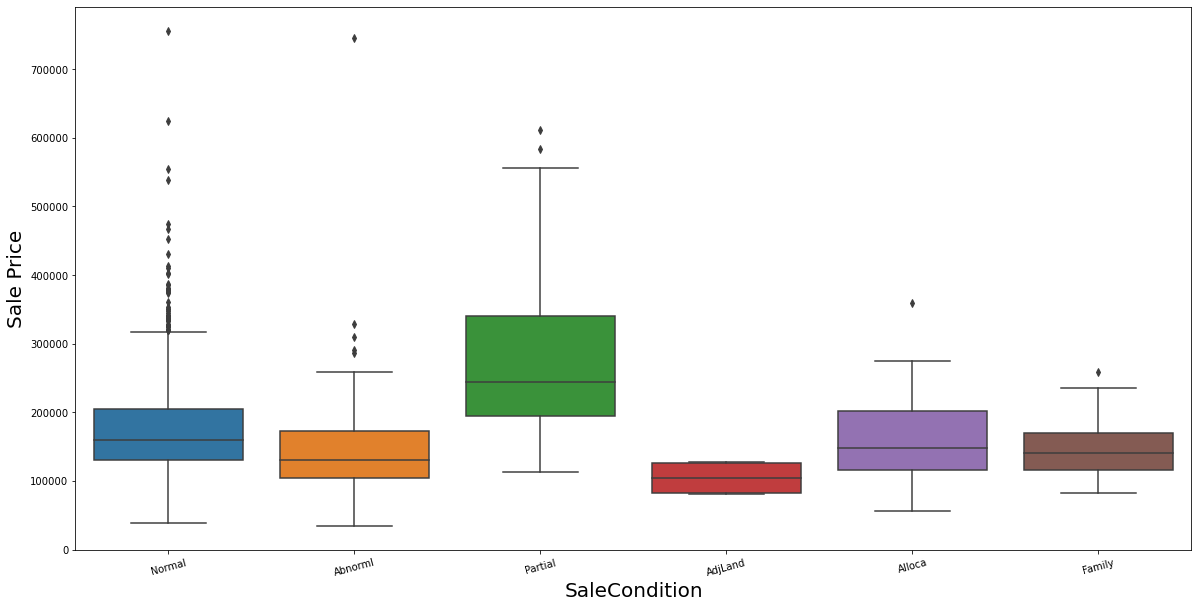

In [13]:
#Correlations between Sales Price & Object Feature
feature_object = 'SaleCondition'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleCondition     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

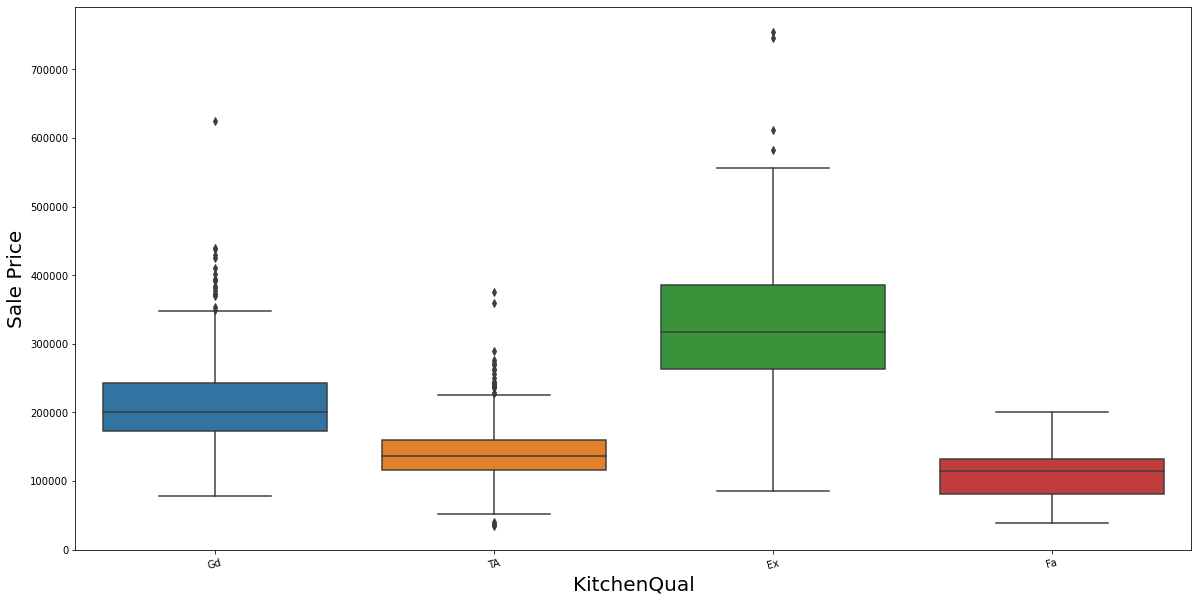

In [14]:
#Correlations between Sales Price & Object Feature
feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

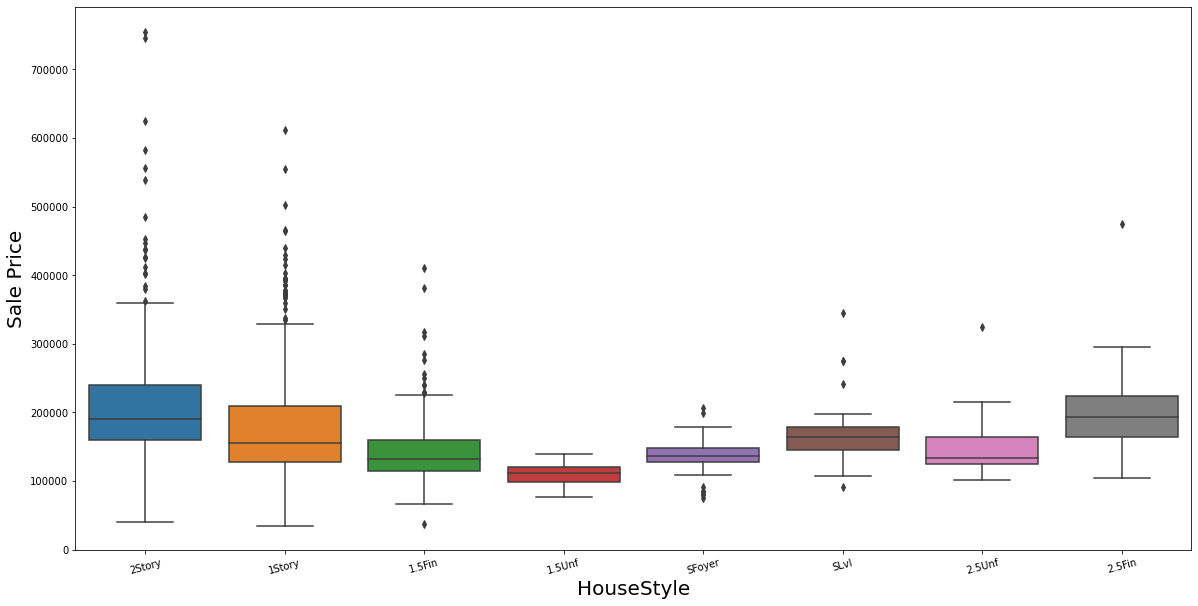

In [15]:
#Correlations between Sales Price & Object Feature
feature_object = 'HouseStyle'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.HouseStyle     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

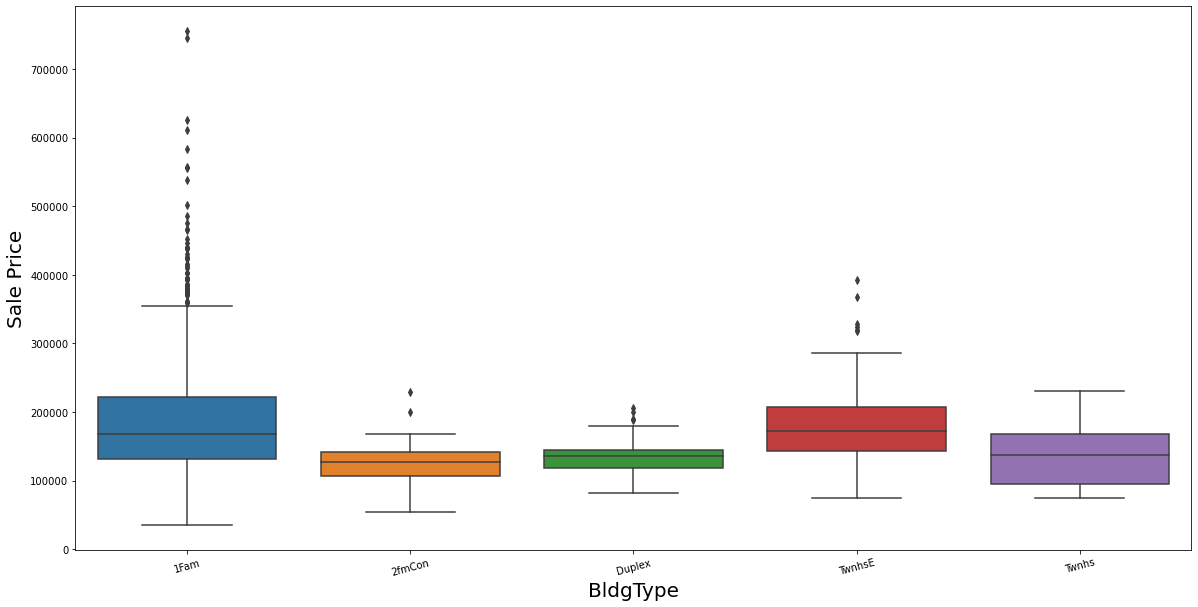

In [16]:
#Correlations between Sales Price & Object Feature
feature_object = 'BldgType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.BldgType     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

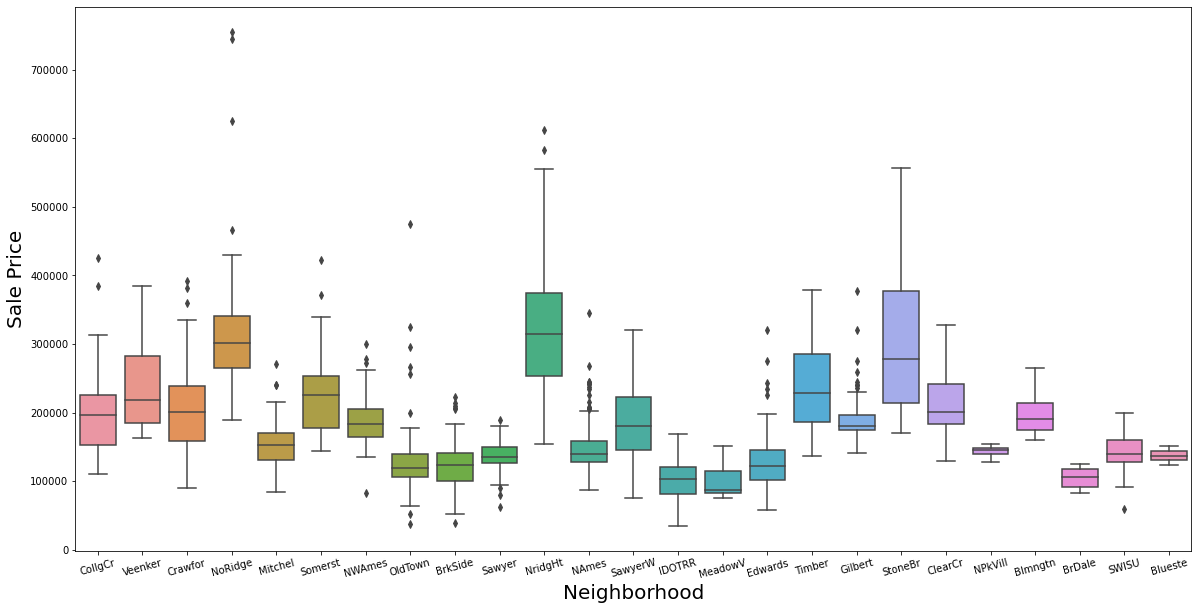

In [17]:
#Correlations between Sales Price & Object Feature
feature_object = 'Neighborhood'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.Neighborhood     #CHANGE THIS TO UPDATE PLOT


plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

## Train/Dev Data with a few features + ML Model

In [18]:
train_df
sf_columns=['GrLivArea', 'TotalBsmtSF','SalePrice']
train_df_baseline=train_df[sf_columns]
train_df_baseline.head()
# LotArea: Lot size in square feet
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area    
# 1stFlrSF: First Floor square feet 
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet    
# GarageArea: Size of garage in square feet
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet

,GrLivArea,TotalBsmtSF,SalePrice
0,1710,856,208500
1,1262,1262,181500
2,1786,920,223500
3,1717,756,140000
4,2198,1145,250000


In [41]:
#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
#test_df_std=scaler.fit_transform(test_df)

print(train_df_std.shape)
#print(test_df_std.shape)

(1460, 3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD5B572F08>,
      dtype=object)

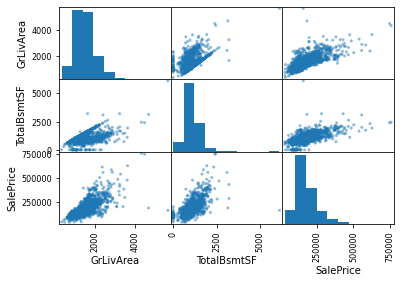

In [19]:
pd.plotting.scatter_matrix(train_df_baseline)

In [42]:
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  #for baseline

#Standardized
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  #for baseline

Estimated function: y = -0.00 + 0.54*x_1 + 0.42*x_2
R^2: 0.6407473734300441
Accuracy: 0.5028574478344117
Root Mean Squared Error: 0.7832821789287566


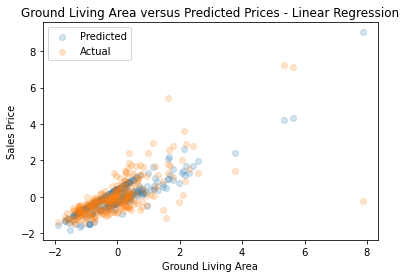

In [47]:
#Linear regression model
lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
#print ("Estimated function: y = %.2f + (x%d) w_i*x_i" %(lr.intercept_, len(lr.coef_)))
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2" %(lr.intercept_, lr.coef_[0], lr.coef_[1]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
# fig2=plt.scatter(dev_data_bl[0],prediction, alpha=0.2)
# fig2=plt.scatter(dev_data_bl[0],dev_labels_bl, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

..........................................................................................
k-Nearest Neighbors:  
Best scores is 0.628 when K is 11


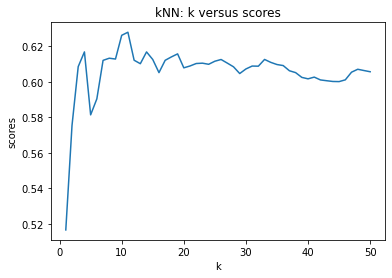

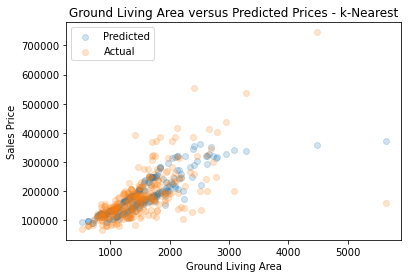

In [22]:
#K-Nearest Neighbors Regressor

print("."*90)
print("k-Nearest Neighbors:  ")
K= [int(x) for x in np.linspace(1,50,50)]  
scores = {}
for k in K:
    # k-Nearest Neighbors Model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data_bl, train_labels_bl)  
    dev_predicted_labels = knn.predict(dev_data_bl)
    # finding, printing, and storing accuracy    
    scores[k] = knn.score(dev_data_bl, dev_labels_bl)
best = max(scores, key=scores.get)
print("Best scores is %.3f when K is %s" %(scores[best],best))
#Plotting
fig1=plt.figure()
fig1=plt.title('kNN: k versus scores')
fig1=plt.xlabel('k')
fig1=plt.ylabel('scores')
fig1=plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - k-Nearest')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_predicted_labels, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

## Train/Dev Data with all columns + ML Model

In [23]:
train_df.shape
train_df.columns

#81 original features/columns becomes 62 features/columns after removing featurets/columns with NaN data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [24]:
#Converted all categorical data to dummy variables
#columns expanded from 62 to 216
np.random.seed(0)

dummies_df = pd.get_dummies(train_df)
X=dummies_df.drop(['SalePrice'],axis=1)
y=dummies_df['SalePrice']

# #scale values between 0 and 1
# features=X.columns.values
# scaler=MinMaxScaler(feature_range=(0,1))
# scaler.fit(X)
# X=pd.DataFrame(scaler.transform(X))
# X.columns=features


train_data_ac, dev_data_ac, train_labels_ac, dev_labels_ac = train_test_split(X,y, test_size=0.2)
print('training data shape:', train_data_ac.shape)
print('training label shape:', train_labels_ac.shape)
print('dev dat shape:',      dev_data_ac.shape)
print('dev label shape:',      dev_labels_ac.shape)
train_data_ac.head()

training data shape: (1168, 216)
training label shape: (1168,)
dev dat shape: (292, 216)
dev label shape: (292,)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
618,619,20,11694,9,5,2007,2007,48,0,1774,...,0,1,0,0,0,0,0,0,0,1
870,871,20,6600,5,5,1962,1962,0,0,894,...,0,0,0,1,0,0,0,0,1,0
92,93,30,13360,5,7,1921,2006,713,0,163,...,0,0,0,1,0,0,0,0,1,0
817,818,20,13265,8,5,2002,2002,1218,0,350,...,0,0,0,1,0,0,0,0,1,0
302,303,20,13704,7,5,2001,2002,0,0,1541,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# NOT SURE IF DONE CORRECTLY

#Linear regression model
def linr():
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_data_ac, train_labels_ac)                 #fit model
    print ("Estimated function: y = %.2f + (x%d) w_i*x_i" %(lr.intercept_, len(lr.coef_)))
    accuracies_prediction = lr.predict(dev_data_ac)    #predict
    print("R^2:",lr.score(train_data_ac,train_labels_ac))    #Finding R^2
    print("Accuracy:",lr.score(dev_data_ac,dev_labels_ac))    #Finding accuracy of dev data
    # lr.coef_[abs(lr.coef_) > 0.1]
    #np.where([abs(lr.coef_) > 0.1])
    #print(lr.coef_)
    #print("prediction prices:", accuracies_prediction)
linr()

Estimated function: y = -1031417.11 + (x216) w_i*x_i
R^2: 0.9306889059525217
Accuracy: 0.573540758837457


..........................................................................................
k-Nearest Neighbors:  
Best scores is 0.546 when K is 1


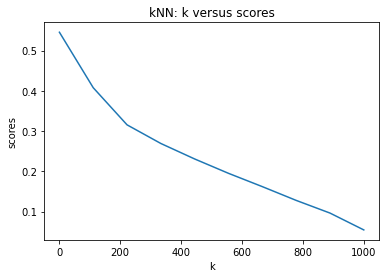

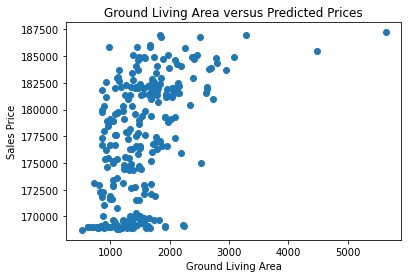

In [26]:
#K-Nearest Neighbors

def kNN():
    print("."*90)
    print("k-Nearest Neighbors:  ")
    K= [int(x) for x in np.linspace(1,1000,10)]    #runs kNN for x100 k's between 1 to 1000
    scores2 = {}   #stores scores for each k
    for k in K:
        # k-Nearest Neighbors Model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data_ac, train_labels_ac)  
        dev_predicted_labels = knn.predict(dev_data_ac)
        # finding, printing, and storing f1_score    
        scores2[k] = knn.score(dev_data_ac, dev_labels_ac)

    best = max(scores2, key=scores2.get)
    print("Best scores is %.3f when K is %s" %(scores2[best],best))
    #Plotting
    fig1=plt.figure()
    fig1=plt.title('kNN: k versus scores')
    fig1=plt.xlabel('k')
    fig1=plt.ylabel('scores')
    fig1=plt.plot(list(scores2.keys()), list(scores2.values()))
    plt.show()

    fig2=plt.figure()
    fig2=plt.title('Ground Living Area versus Predicted Prices')
    fig2=plt.xlabel('Ground Living Area')
    fig2=plt.ylabel('Sales Price')
    fig2=plt.scatter(dev_data_ac['GrLivArea'],dev_predicted_labels)
    #fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl)
kNN()

..........................................................................................
Naive Bayes:  
Best f1_score is 0.006930854533594259236917167755 when alpha is 10.0


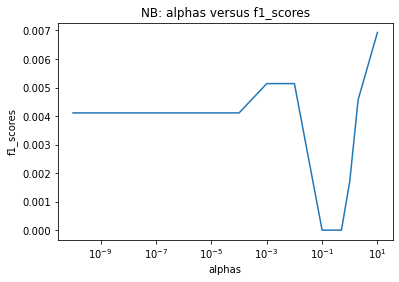

In [27]:
#Naive Bayes

def NB():
    print("."*90)
    print("Naive Bayes:  ")
    alphas = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]  
    #varying by magnitudes of alpha to capture a wide range of values
    f1_scores = {}      #stores f1_scores for each alpha
    for alpha in alphas:
        # Naive Bayes Model
        mnb = MultinomialNB(alpha=alpha)
        mnb.fit(train_data_ac, train_labels_ac)
        dev_predicted_labels = mnb.predict(dev_data_ac)
        # finding, printing, and storing f1_score    
        f1_score = metrics.f1_score(dev_labels_ac, dev_predicted_labels, average='weighted')
        #print("For Alpha: %s, f1_score: %.03f" %(alpha,f1_score))
        f1_scores[alpha] = f1_score
    best = max(f1_scores, key=f1_scores.get)
    print("Best f1_score is %0.30f when alpha is %s" %(f1_scores[best],best))
    #Plotting
    fig2=plt.figure()
    fig2=plt.title('NB: alphas versus f1_scores')
    fig2=plt.xlabel('alphas')
    fig2=plt.ylabel('f1_scores')
    plt.xscale('log')
    fig2=plt.plot(list(f1_scores.keys()), list(f1_scores.values()))
NB()